### Комплекс задача про грибы

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
mushrooms = pd.read_csv('training_mush.csv')
mushrooms

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [4]:
mushrooms.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

поделим данные на фичи и целевую переменную

In [7]:
X = mushrooms.drop('class', axis = 1)
y = mushrooms['class']


создадим классификатор

In [8]:
clf = RandomForestClassifier(random_state=0)

зададим параметры и подберем лучшие при помощи подборщика
- количество деревьев - от 10 до 50 с шагом 10
- глубину от 1 до 12 с шагом 2
- минимальный размер листочка (числа наблюдений, на которые будет разбиваться): от 1 до 7
- минимальный сплит (мин число налюдений, достаточного для деления): от 2 до 9 с шагом 2

In [9]:
params = {'max_depth': range(1,14,2), 'n_estimators': range(10,60,10), 
          'min_samples_leaf': range(1,8), 'min_samples_split': range(2,9,2)}

grid_search_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

# Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры

Обучим модель на имеющихся данных, найдем наилучшие параметры и наилучшую модель:

In [10]:
grid_search_clf.fit(X,y)

grid_search_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Очень долго (почти три минуты), но все же результат есть.

In [11]:
best_clf = grid_search_clf.best_estimator_

Строим таблицу важности фичей, сортируем по убыванию

In [13]:
feature_importances_df = pd.DataFrame({'features':list(X.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances', ascending= False)

feature_importances_df

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


#### подзадача - посчитать количество съедобных грибов в тестовом датасэте

несъедобные грибы зашифрованы под классом = 1

In [14]:
mush_test = pd.read_csv('testing_mush.csv')
mush_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [24]:
y_predicted = best_clf.predict(mush_test)

pred_df = pd.DataFrame(data= y_predicted, columns= ['predicted_class'])

pred_df

# создать датасэт dataframe из массива np.array 

,predicted_class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [28]:
pred_df.value_counts()

predicted_class
0                  1055
1                   976
dtype: int64

Кстати, прикольная штука - файл zip открывается только при условии введенного пароля

пароль - выдается при решении прошлой задачи.

In [32]:
import zipfile

password = 'Cool!Move_forward!'
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.namelist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


#### Три способа построить матрицу путанницы! confusion_matrix 

Считаем матрицу путанницы ( confusion_matrix) и строим (рисуем) ее:

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_predicted))

[[1055    0]
 [   0  976]]


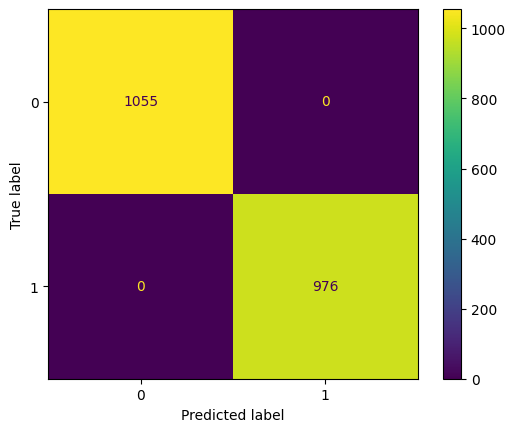

In [39]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_estimator(best_clf, mush_test, y_true )

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


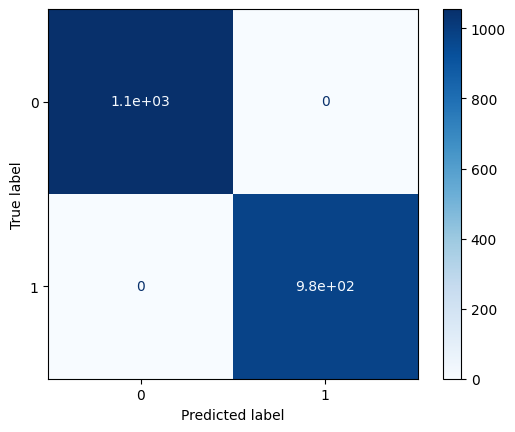

In [41]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_clf, mush_test, y_true, cmap=plt.cm.Blues, values_format='.2g')